# Homework RNNs
1. Download and explore data
2. Preproceess data if needed
3. Create a dataset with group of inputs of some size (between 10 and 50) - Similar to this [example](https://colab.research.google.com/drive/1tj0DRWxVvRC7_b7ubQ46zJo4ZuxT4jbW?authuser=1)
4. Split the data into train and test
5. Use 3 different RNN types and rank them in terms of performance - only use the functional API of Keras

In [0]:
!wget https://storage.googleapis.com/nicksdemobucket/sunspots.csv

# OR

!wget https://storage.googleapis.com/nicksdemobucket/temperatures.csv

# OR MNIST

--2020-02-18 00:02:52--  https://storage.googleapis.com/nicksdemobucket/sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 2607:f8b0:400c:c13::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45039 (44K) [application/octet-stream]
Saving to: ‘sunspots.csv.1’

sunspots.csv.1      100%[===================>]  43.98K  --.-KB/s    in 0s      

2020-02-18 00:02:52 (159 MB/s) - ‘sunspots.csv.1’ saved [45039/45039]

--2020-02-18 00:02:53--  https://storage.googleapis.com/nicksdemobucket/temperatures.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 2607:f8b0:400c:c13::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/csv]
Saving to: ‘temperatures.csv.1’

temperatures.csv.1  100%[===================

In [2]:
from google.colab import files
uploaded = files.upload()


ModuleNotFoundError: No module named 'google.colab'

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('sunspots.csv')

df.head(10)

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
5,1749-06,83.5
6,1749-07,94.8
7,1749-08,66.3
8,1749-09,75.9
9,1749-10,75.5


In [5]:
sequence = df.Sunspots.values

def generate_data(sequence):
  X = []
  y = []
  input_sequence_length = 25
  for i in range(len(sequence) - input_sequence_length - 1):
    subsequence = sequence[i: i + input_sequence_length]
    target = sequence[i + input_sequence_length + 1]
    X.append(subsequence)
    y.append(target)

  X = np.array(X)
  y = np.array(y)
  return X, y

In [9]:
sequence_train = generate_data(sequence[: int(0.5 * len(sequence))])
sequence_test = generate_data(sequence[int(0.5 * len(sequence)): ])

sequence_test[0].shape
# sequence_train[1].shape

(1384, 25)

In [7]:
X, y = sequence_train
X_test, y_test = sequence_test

# reshaping
X, y = X[:,:,None], y[:,None]
X_test, y_test = X_test[:,:,None], y_test[:,None]

In [0]:
%tensorflow_version 2.x
import tensorflow as tf


In [24]:

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, Input, Dense, LSTM, SimpleRNN, GRU

inputs = Input(shape=(25,1))
hidden = SimpleRNN(100, input_shape=(25,), return_sequences=True)(inputs)
hidden = SimpleRNN(100, input_shape=(25,100), return_sequences=True)(hidden)
hidden = SimpleRNN(10, input_shape=(25,100))(hidden)
outputs = Dense(1)(hidden)
func_model = keras.Model(inputs=inputs, outputs=outputs, name='Simple_model')
func_model.compile(loss=keras.losses.mean_squared_error, 
                   optimizer=keras.optimizers.Adam(), 
                   metrics=[keras.metrics.mean_squared_error])
func_model.summary()


Model: "Simple_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 25, 100)           10200     
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 25, 100)           20100     
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 10)                1110      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 31,421
Trainable params: 31,421
Non-trainable params: 0
_________________________________________________________________


In [25]:
history_Simple = func_model.fit(X, y, batch_size=10, epochs=50, validation_data=[X_test, y_test])

Train on 1384 samples, validate on 1384 samples
Epoch 1/50
1384/1384 [==============================] - 9s 6ms/sample - loss: 3378.5987 - mean_squared_error: 3378.5994 - val_loss: 4891.2259 - val_mean_squared_error: 4891.2251
Epoch 2/50
1384/1384 [==============================] - 7s 5ms/sample - loss: 3246.0797 - mean_squared_error: 3246.0798 - val_loss: 4742.3681 - val_mean_squared_error: 4742.3682
Epoch 3/50
1384/1384 [==============================] - 7s 5ms/sample - loss: 3128.0129 - mean_squared_error: 3128.0122 - val_loss: 4601.7934 - val_mean_squared_error: 4601.7939
Epoch 4/50
1384/1384 [==============================] - 7s 5ms/sample - loss: 3016.8378 - mean_squared_error: 3016.8384 - val_loss: 4468.2090 - val_mean_squared_error: 4468.2090
Epoch 5/50
1384/1384 [==============================] - 7s 5ms/sample - loss: 2911.2961 - mean_squared_error: 2911.2959 - val_loss: 4341.4337 - val_mean_squared_error: 4341.4326
Epoch 6/50
1384/1384 [==============================] - 7s 5ms

In [26]:
history_Simple.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

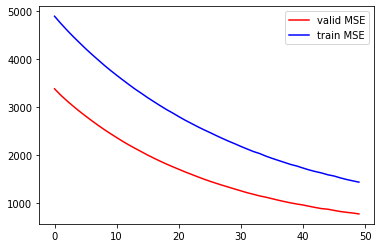

In [27]:
import matplotlib.pyplot as plt
plt.plot(history_Simple.history['mean_squared_error'], 'r')
plt.plot(history_Simple.history['val_mean_squared_error'], 'b')
plt.legend(['valid MSE', 'train MSE'])

In [28]:
inputs = Input(shape=(25,1))
hidden = LSTM(100, input_shape=(25,), return_sequences=True)(inputs)
hidden = LSTM(100, input_shape=(25,100), return_sequences=True)(hidden)
hidden = LSTM(10, input_shape=(25,100))(hidden)
outputs = Dense(1)(hidden)
func_model = keras.Model(inputs=inputs, outputs=outputs, name='LSTM_model')
func_model.compile(loss=keras.losses.mean_squared_error, 
                   optimizer=keras.optimizers.Adam(), 
                   metrics=[keras.metrics.mean_squared_error])
func_model.summary()



Model: "LSTM_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 25, 100)           40800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 25, 100)           80400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                4440      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 125,651
Trainable params: 125,651
Non-trainable params: 0
_________________________________________________________________


In [29]:
history_LSTM = func_model.fit(X, y, batch_size=10, epochs=50, validation_data=[X_test, y_test])

Train on 1384 samples, validate on 1384 samples
Epoch 1/50
1384/1384 [==============================] - 5s 3ms/sample - loss: 3284.0507 - mean_squared_error: 3284.0505 - val_loss: 4755.8311 - val_mean_squared_error: 4755.8306
Epoch 2/50
1384/1384 [==============================] - 2s 1ms/sample - loss: 3134.8570 - mean_squared_error: 3134.8572 - val_loss: 4605.8767 - val_mean_squared_error: 4605.8755
Epoch 3/50
1384/1384 [==============================] - 2s 1ms/sample - loss: 3018.3848 - mean_squared_error: 3018.3850 - val_loss: 4469.0762 - val_mean_squared_error: 4469.0757
Epoch 4/50
1384/1384 [==============================] - 2s 1ms/sample - loss: 2909.6889 - mean_squared_error: 2909.6885 - val_loss: 4337.4213 - val_mean_squared_error: 4337.4214
Epoch 5/50
1384/1384 [==============================] - 2s 1ms/sample - loss: 2805.5817 - mean_squared_error: 2805.5823 - val_loss: 4211.7032 - val_mean_squared_error: 4211.7041
Epoch 6/50
1384/1384 [==============================] - 2s 1ms

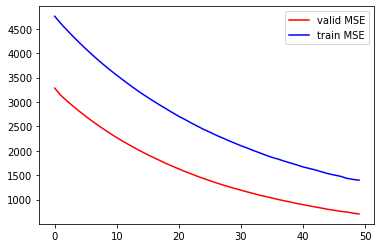

In [30]:
import matplotlib.pyplot as plt
plt.plot(history_LSTM.history['mean_squared_error'], 'r')
plt.plot(history_LSTM.history['val_mean_squared_error'], 'b')
plt.legend(['valid MSE', 'train MSE'])

In [31]:
inputs = Input(shape=(25,1))
hidden = GRU(100, input_shape=(25,), return_sequences=True)(inputs)
hidden = GRU(100, input_shape=(25,100), return_sequences=True)(hidden)
hidden = GRU(10, input_shape=(25,100))(hidden)
outputs = Dense(1)(hidden)
func_model = keras.Model(inputs=inputs, outputs=outputs, name='GRU_model')
func_model.compile(loss=keras.losses.mean_squared_error, 
                   optimizer=keras.optimizers.Adam(), 
                   metrics=[keras.metrics.mean_squared_error])
func_model.summary()



Model: "GRU_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
gru_3 (GRU)                  (None, 25, 100)           30900     
_________________________________________________________________
gru_4 (GRU)                  (None, 25, 100)           60600     
_________________________________________________________________
gru_5 (GRU)                  (None, 10)                3360      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 94,871
Trainable params: 94,871
Non-trainable params: 0
_________________________________________________________________


In [32]:
history_GRU = func_model.fit(X, y, batch_size=10, epochs=50, validation_data=[X_test, y_test])

Train on 1384 samples, validate on 1384 samples
Epoch 1/50
1384/1384 [==============================] - 4s 3ms/sample - loss: 3227.7986 - mean_squared_error: 3227.7981 - val_loss: 4704.8897 - val_mean_squared_error: 4704.8892
Epoch 2/50
1384/1384 [==============================] - 1s 1ms/sample - loss: 3096.0739 - mean_squared_error: 3096.0747 - val_loss: 4563.1895 - val_mean_squared_error: 4563.1895
Epoch 3/50
1384/1384 [==============================] - 1s 1ms/sample - loss: 2982.8851 - mean_squared_error: 2982.8857 - val_loss: 4427.0662 - val_mean_squared_error: 4427.0649
Epoch 4/50
1384/1384 [==============================] - 1s 1ms/sample - loss: 2877.0388 - mean_squared_error: 2877.0388 - val_loss: 4298.5403 - val_mean_squared_error: 4298.5400
Epoch 5/50
1384/1384 [==============================] - 1s 1ms/sample - loss: 2775.4833 - mean_squared_error: 2775.4836 - val_loss: 4175.0772 - val_mean_squared_error: 4175.0762
Epoch 6/50
1384/1384 [==============================] - 1s 1ms

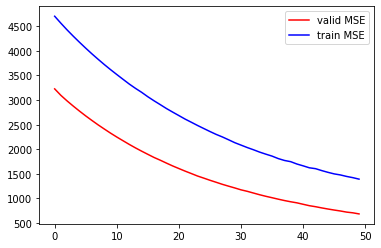

In [33]:
plt.plot(history_GRU.history['mean_squared_error'], 'r')
plt.plot(history_GRU.history['val_mean_squared_error'], 'b')
plt.legend(['valid MSE', 'train MSE'])

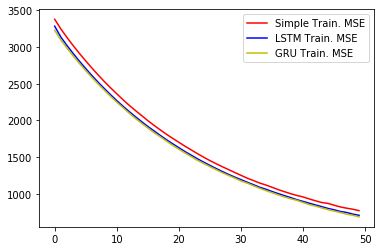

In [34]:
plt.plot(history_Simple.history['mean_squared_error'],'r' ,history_LSTM.history['mean_squared_error'], 'b', history_GRU.history['mean_squared_error'], 'y')
plt.legend(['Simple Train. MSE', 'LSTM Train. MSE', 'GRU Train. MSE'])

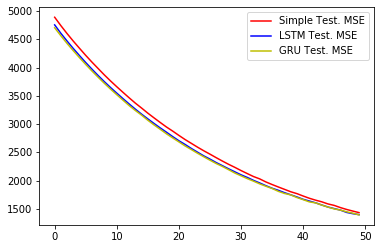

In [36]:
plt.plot(history_Simple.history['val_mean_squared_error'], 'r', history_LSTM.history['val_mean_squared_error'] , 'b', history_GRU.history['val_mean_squared_error'], 'y')
plt.legend(['Simple Test. MSE', 'LSTM Test. MSE', 'GRU Test. MSE'])

It is clear that both LSTM and GRU models are faster than the Simple RNN, also they have better performance in terms of the mean square error.

Now if we compare LSTM and GRU models, we can see that they are very close to each other here in my experment. However, the GRU model is a bit faster and has less mean square error on testing data.
Therefore, I can give them the following ranking:
1- GRU 
2- LSTM
3- Simple RNN